# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\carol\Documents\DA\02 Data Inmersion\06 Advanced Analytics & Dashboard Design\Olist Analysis'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'order_reviews_final.csv'), index_col = False)

In [5]:
# Check dataset

df.head()

,Unnamed: 0,order_id,review_score,order_lead_time,order_days_delayed,days_late,lead_time_days
0,2,00010242fe8c5a6d1ba2dd792cb16214,5.0,7.614421,-8.011250,5-10 days early,5-10 days
1,3,00018f77f2f0320c557190d7a144bdd3,4.0,16.216181,-2.330278,0-5 days early,15-20 days
2,4,000229ec398224ef6ca0657da4fc703e,5.0,7.948437,-13.444954,>10 days early,5-10 days
3,5,00024acbcdf0a6daa1e931b038114c75,4.0,6.147269,-5.435660,5-10 days early,5-10 days
4,6,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,25.114352,-15.303808,>10 days early,>20 days


# 03. Data wrangling

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94499 entries, 0 to 94498
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          94499 non-null  int64  
 1   order_id            94499 non-null  object 
 2   review_score        94499 non-null  float64
 3   order_lead_time     94499 non-null  float64
 4   order_days_delayed  94499 non-null  float64
 5   days_late           94499 non-null  object 
 6   lead_time_days      94499 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 5.0+ MB


In [7]:
# Drop columns

df = df.drop(columns = ['Unnamed: 0'])

# 04.Data cleaning

In [8]:
df.columns

Index(['order_id', 'review_score', 'order_lead_time', 'order_days_delayed',
       'days_late', 'lead_time_days'],
      dtype='object')

In [9]:
df.shape

(94499, 6)

## Missing values

In [10]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

order_id              0
review_score          0
order_lead_time       0
order_days_delayed    0
days_late             0
lead_time_days        0
dtype: int64

In [11]:
# Drop row with missing value

df = df.dropna()

## Duplicates check

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # No dups

(94499,)

## Extreme values checks

C:\Users\carol\AppData\Local\Temp\ipykernel_1708\2905216580.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['order_lead_time'], bins=25) # Shows extreme values


<Axes: xlabel='order_lead_time', ylabel='Density'>

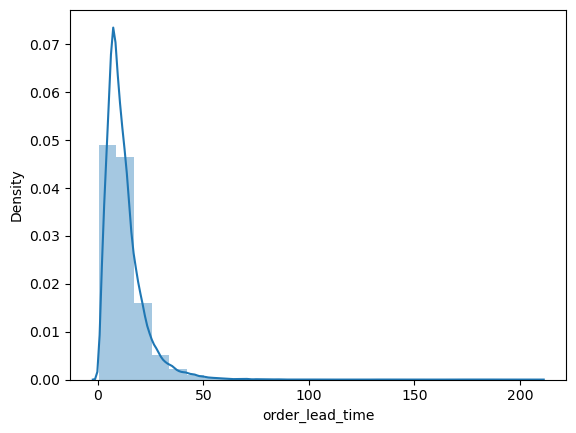

In [14]:
sns.distplot(df['order_lead_time'], bins=25) # Shows extreme values

# no outliers

In [15]:
df['order_lead_time'].mean() # Check the mean

12.512797250597991

In [16]:
df['order_lead_time'].median() # Check the median

10.202824074074076

In [17]:
df['order_lead_time'].max() # Check the max

208.35175925925927

# 05. Data prep for regression analysis

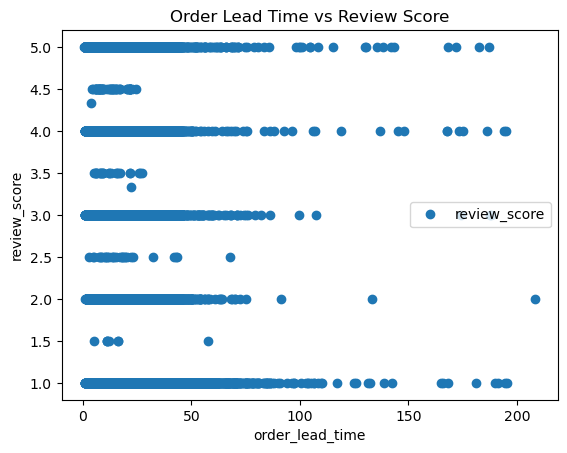

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'order_lead_time', y='review_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Order Lead Time vs Review Score')  
plt.xlabel('order_lead_time')  
plt.ylabel('review_score')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['order_lead_time'].values.reshape(-1,1)
y = df['review_score'].values.reshape(-1,1)

In [20]:
X

array([[ 7.6144213 ],
       [16.21618056],
       [ 7.9484375 ],
       ...,
       [ 4.80168981],
       [ 1.95603009],
       [ 5.03898148]])

In [21]:
y

array([[5.],
       [4.],
       [5.],
       ...,
       [5.],
       [5.],
       [5.]])

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 06. Regression analysis

## Hypothesis: The shorter the lead time the better the review

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

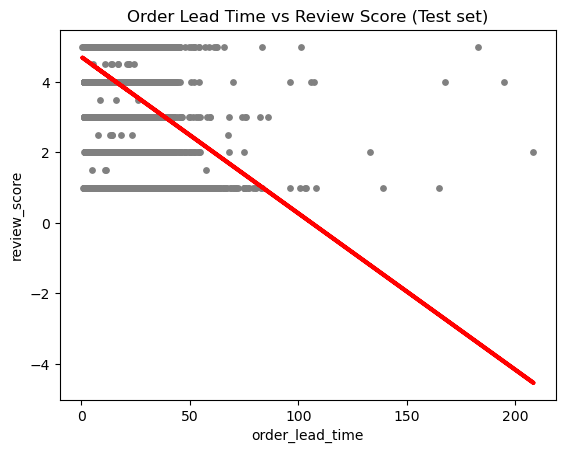

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Order Lead Time vs Review Score (Test set)')
plot_test.xlabel('order_lead_time')
plot_test.ylabel('review_score')
plot_test.show()

### The linear model represented by the red regression line doesn’t perfectly cover all of the data points. For instance, ton order with a 200 days lead time has a high review.

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.04441946]]
Mean squared error:  1.450077961076358
R2 score:  0.11732366202022004


### Slope: the slope shows there's a weak negative relationship between vairables. The slope here means that as the lead time increases, the order review slightly decreases at a degree of 0.04.
### MSE: the root mean squared error is large, indicating that the data points are far away from the regression line.  It’s safe to say that a regression may not be the best model to represent this data and can’t accurately predict the influence of lead time on the review score.
### R2 score: the 11% score indicates that the model is not a great fit.

In [29]:
y_predicted

array([[4.44475662],
       [3.57201343],
       [4.11377611],
       ...,
       [4.14027766],
       [3.96694151],
       [3.78051396]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.0,4.444757
1,3.0,3.572013
2,3.0,4.113776
3,1.0,3.810496
4,5.0,4.501931
5,5.0,3.376498
6,5.0,4.262476
7,5.0,4.252468
8,5.0,4.315199
9,5.0,3.995053


### There’s a big difference between the actual and predicted y values. This just adds evidence to the fact that the model isn’t doing a great job of explaining the relationship between the “Lead Time” and “Order Review” variables. The relationship simply doesn’t follow a single, straight regression line 

## Compare how the regression fits the training set

In [31]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.04441946]]
Mean squared error:  1.463757120283009
R2 score:  0.10971877712581446


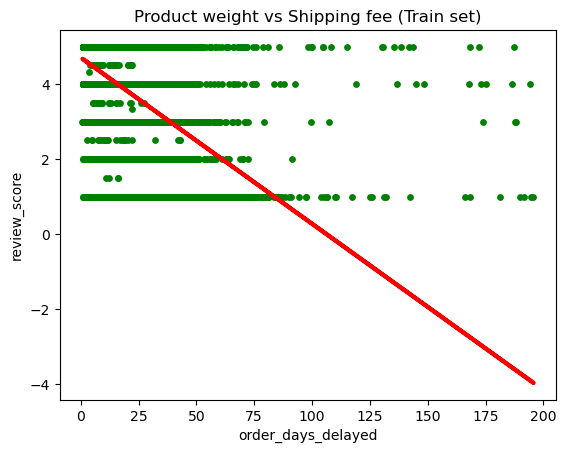

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Product weight vs Shipping fee (Train set)')
plot_test.xlabel('order_days_delayed')
plot_test.ylabel('review_score')
plot_test.show()